In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

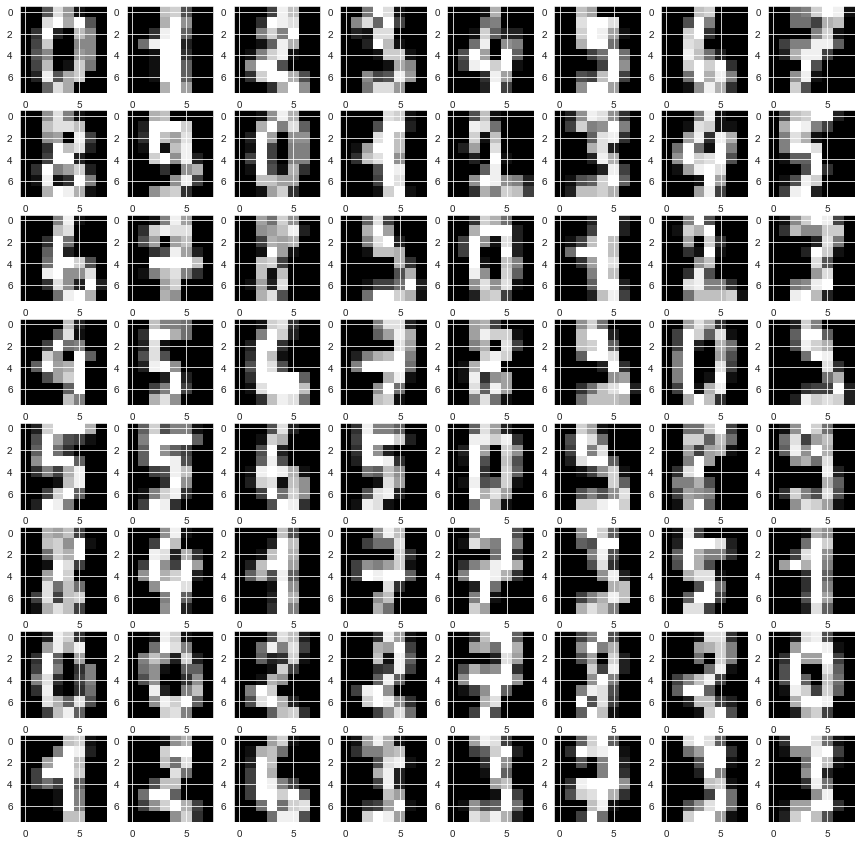

In [61]:
f, axes = plt.subplots(8,8)
f.set_size_inches((15,15))
for i in range(8):
    for j in range (8):
        axes[i][j].imshow(digits.images[i*8+j], cmap='gray')
plt.show()

In [27]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [28]:
from sklearn.model_selection import train_test_split
data = digits.data
target = digits.target
X_data, X_test, y_data, y_test = train_test_split(data, target, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
prediction = rf_model.predict(X_valid)
print("accuracy score : {0}".format(accuracy_score(prediction, y_valid)))
classification_report(prediction, y_valid)

accuracy score : 0.9826388888888888


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        29\n           1       0.97      1.00      0.99        34\n           2       1.00      0.97      0.98        32\n           3       0.96      0.96      0.96        25\n           4       1.00      0.96      0.98        24\n           5       1.00      0.93      0.96        27\n           6       0.96      1.00      0.98        27\n           7       1.00      1.00      1.00        36\n           8       1.00      1.00      1.00        25\n           9       0.94      1.00      0.97        29\n\n    accuracy                           0.98       288\n   macro avg       0.98      0.98      0.98       288\nweighted avg       0.98      0.98      0.98       288\n'

In [35]:
final_prediction = rf_model.predict(X_test)
print("accuracy score : {0}".format(accuracy_score(final_prediction, y_test)))
classification_report(final_prediction, y_test)

accuracy score : 0.9861111111111112


'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        41\n           1       1.00      1.00      1.00        32\n           2       1.00      1.00      1.00        40\n           3       0.98      1.00      0.99        40\n           4       0.97      1.00      0.99        34\n           5       1.00      0.97      0.99        40\n           6       0.96      1.00      0.98        27\n           7       1.00      0.97      0.99        37\n           8       0.97      0.97      0.97        38\n           9       0.97      0.97      0.97        31\n\n    accuracy                           0.99       360\n   macro avg       0.99      0.99      0.99       360\nweighted avg       0.99      0.99      0.99       360\n'

### Discussion
The f1-score is pretty high in every number. 8 had lowest f1_score which is 0.97.
Validation score and test score is pretty mush same, so there are no overfitting.

C:\Users\Dongkyu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


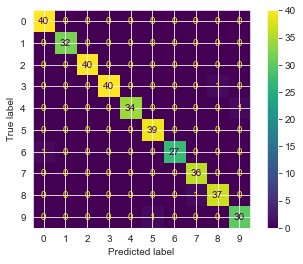

In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test, y_test)

### Discussion
Confusion Matrix looks prefect. This random forest model is really accurate.

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data, target)
pca_data

array([[ -1.25946838,  21.27487609],
       [  7.95760879, -20.76869913],
       [  6.99192653,  -9.95597828],
       ...,
       [ 10.80128474,  -6.96025689],
       [ -4.87210252,  12.42395662],
       [ -0.34438695,   6.3655451 ]])

<AxesSubplot:>

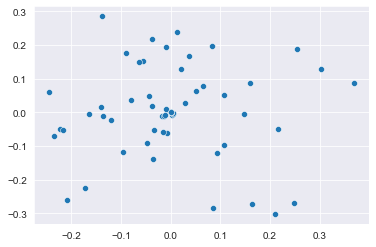

In [47]:
sns.scatterplot(x=pca.components_[0], y=pca.components_[1])

### Discussion
It is hard to classify each class with 2 components of PCA

<AxesSubplot:>

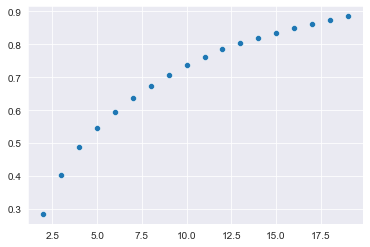

In [55]:
variance_ratio = []
for i in range(2, 20):
    pca = PCA(n_components=i)
    pca.fit(data, target)
    variance_ratio.append(sum(pca.explained_variance_ratio_))
sns.scatterplot(x=[i for i in range(2, 20)], y=variance_ratio)

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=2021)
kmeans.fit(data)
print("Kmeans cluster center shape : {0}".format(kmeans.cluster_centers_.shape))
cluster_center = kmeans.cluster_centers_
cluster_center = cluster_center.reshape(-1, 8, 8)

Kmeans cluster center shape : (10, 64)


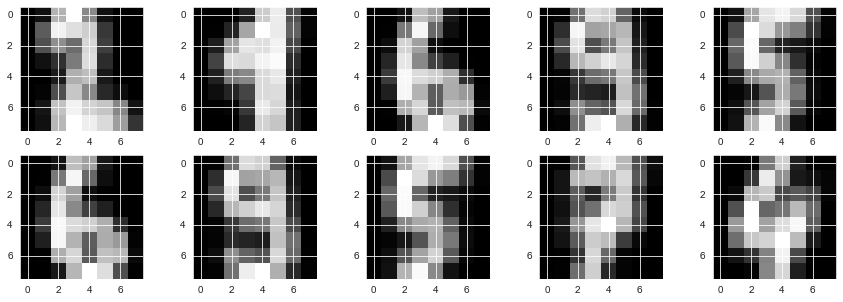

In [93]:
f, axes = plt.subplots(2,5)
f.set_size_inches((15,5))
for i in range(2):
    for j in range (5):
        axes[i][j].imshow(cluster_center[i*2+j], cmap='gray')
plt.show()

In [125]:
for label in range (10):
    this_label = np.where(kmeans.labels_ == label)
    accuracy = []
    for pseudo_label in range (10):
        accuracy.append(accuracy_score(np.full(this_label[0].shape, pseudo_label), target[this_label]))
    best_label = np.array(accuracy).argmax()
    print("best label for {0} is {1}".format(label, best_label))
    print("accuracy is {0}".format(accuracy[best_label]))

best label for 0 is 2
accuracy is 0.8457142857142858
best label for 1 is 1
accuracy is 0.6043956043956044
best label for 2 is 6
accuracy is 0.9725274725274725
best label for 3 is 9
accuracy is 0.562753036437247
best label for 4 is 5
accuracy is 0.8662420382165605
best label for 5 is 7
accuracy is 0.845771144278607
best label for 6 is 4
accuracy is 0.9820359281437125
best label for 7 is 3
accuracy is 0.8707865168539326
best label for 8 is 0
accuracy is 0.9888268156424581
best label for 9 is 8
accuracy is 0.45454545454545453


In [126]:
relabel_dict = {
    0 : 2,
    1 : 1,
    2 : 6,
    3 : 9,
    4 : 5,
    5 : 7,
    6 : 4,
    7 : 3,
    8 : 0,
    9 : 8
}

In [128]:
relabeled_data = np.vectorize(lambda x: relabel_dict[x])(kmeans.labels_)
print("Final KMeans best accuracy score is {0}".format(accuracy_score(relabeled_data, target)))

Final KMeans best accuracy score is 0.7907623817473567


<AxesSubplot:>

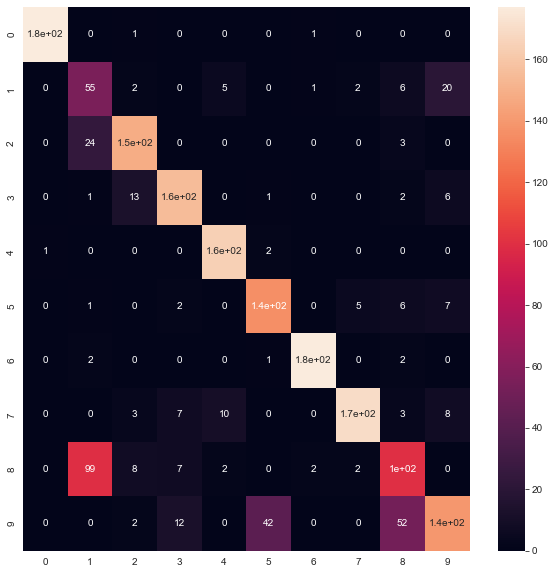

In [133]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(relabeled_data, target), annot=True)

### Discussion
Some of clustering data is not accurate. Because this is unsupervised learning, accuracy is worse than tree-based algorithms.